In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pprint import pprint
%matplotlib inline

In [3]:
# Setting up the work directory

os.chdir("D:/Edwisor/Cab Fare Prediction")
print(os.getcwd())

D:\Edwisor\Cab Fare Prediction


In [4]:
# Loading data
train = pd.read_csv("train_cab.csv", na_values={"pickup_datetime":"43"})
test = pd.read_csv("test.csv")


**<h2>Understanding the data:</h2>**

In [5]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [6]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [7]:
print("Shape of training data is: ",train.shape)
print("Shape of test data is: ",test.shape)

Shape of training data is:  (16067, 7)
Shape of test data is:  (9914, 6)


In [8]:
train.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [9]:
test.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [10]:
train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [11]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


**<h2>Data Cleaning & Missing Value Analysis: </h2>**

In [12]:
# Converting fare amount to numeric
train["fare_amount"] = pd.to_numeric(train["fare_amount"], errors='coerce') # Using coerce will replace any non numeric value with NaN.

In [13]:
train.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [14]:
train.shape

(16067, 7)

In [15]:
train.dropna(subset=["pickup_datetime"]) # Dropping NA values rfom datetime column.

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0


In [16]:
# Change data type of pickup_datetime from object to datetime.
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [17]:
#Separate the pickup_datetime columns to different columns i.e year, month, day 

train['year'] = train['pickup_datetime'].dt.year
train['Month'] = train['pickup_datetime'].dt.month
train['Date'] = train['pickup_datetime'].dt.day
train['Day'] = train['pickup_datetime'].dt.dayofweek
train['Hour'] = train['pickup_datetime'].dt.hour
train['Minute'] = train['pickup_datetime'].dt.minute

In [18]:
train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
year                        float64
Month                       float64
Date                        float64
Day                         float64
Hour                        float64
Minute                      float64
dtype: object

In [19]:
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'],format= "%Y-%m-%d %H:%M:%S UTC")

In [20]:
#Separate the pickup_datetime columns to different columns i.e year, month, day 

test['year'] = test['pickup_datetime'].dt.year
test['Month'] = test['pickup_datetime'].dt.month
test['Date'] = test['pickup_datetime'].dt.day
test['Day'] = test['pickup_datetime'].dt.dayofweek
test['Hour'] = test['pickup_datetime'].dt.hour
test['Minute'] = test['pickup_datetime'].dt.minute

In [21]:
test.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int64
Month                         int64
Date                          int64
Day                           int64
Hour                          int64
Minute                        int64
dtype: object

In [22]:
# Removing the missing values from datetime rows
train = train.drop(train[train['pickup_datetime'].isnull()].index, axis=0)
print(train.shape)
print(train['pickup_datetime'].isnull().sum())

(16066, 13)
0


Checking the passenger count variable:

In [23]:
train['passenger_count'].describe()

count    16011.000000
mean         2.625171
std         60.846021
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

We can see that the maximum number of passenger count is 5345 which is not possible. So reducing
the passenger number to 6.

In [24]:
train = train.drop(train[train['passenger_count']>6].index, axis=0)

In [25]:
# Removing the values with passenger count of 0.
train = train.drop(train[train['passenger_count']==0].index, axis=0)

In [26]:
train['passenger_count'].describe()

count    15934.000000
mean         1.649581
std          1.265943
min          0.120000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [27]:
train['passenger_count'].sort_values(ascending=True)

8862     0.12
0        1.00
9790     1.00
9791     1.00
9792     1.00
         ... 
8076      NaN
8139      NaN
8259      NaN
8306      NaN
16066     NaN
Name: passenger_count, Length: 15989, dtype: float64

In [28]:
# removing the missing values from passenger count rows
train = train.drop(train[train['passenger_count'].isnull()].index, axis=0)
print(train.shape)
print(train['passenger_count'].isnull().sum())

(15934, 13)
0


Removing the fractional value of passenger count as that is not possible.

In [29]:
train = train.drop(train[train['passenger_count']==0.12].index, axis=0)
train.shape

(15933, 13)

Analysing the pickup lattitude and longitude

In [30]:
#As lattitude range is from (-90 to 90) and Longitude range is (-180 to 180), we need to drop the rows outside these ranges.

train[train['pickup_latitude']<-90]
train[train['pickup_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
5686,3.3,2011-07-30 11:15:00,-73.947235,401.083332,-73.951392,40.778927,1.0,2011.0,7.0,30.0,5.0,11.0,15.0


In [31]:
# Dropping the only value
train = train.drop(train[train['pickup_latitude']<-90].index, axis=0)
train = train.drop(train[train['pickup_latitude']>90].index, axis=0)

In [32]:
train[train['pickup_longitude']<-180]
train[train['pickup_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [33]:
train[train['dropoff_latitude']<-90]
train[train['dropoff_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [34]:
train[train['dropoff_longitude']<-180]
train[train['dropoff_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


Only one out of range value is present.

In [35]:
train.shape

(15932, 13)

In [36]:
train.isnull().sum()

fare_amount          24
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count       0
year                  0
Month                 0
Date                  0
Day                   0
Hour                  0
Minute                0
dtype: int64

In [37]:
test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

Analysing the Fare Amount Variable:

In [38]:
train['fare_amount'].sort_values(ascending=False)

1015    54343.0
1072     4343.0
607       453.0
980       434.0
1335      180.0
         ...   
1712        NaN
2412        NaN
2458        NaN
8178        NaN
8226        NaN
Name: fare_amount, Length: 15932, dtype: float64

In [39]:
Counter(train["fare_amount"]<0)

Counter({False: 15929, True: 3})

In [40]:
train = train.drop(train[train['fare_amount']<0].index, axis=0)
train.shape

(15929, 13)

In [41]:
#Checking for negative values as prices cannot be in negative!
train['fare_amount'].min()

0.0

In [42]:
# Removing rows where fare is zero
train = train.drop(train[train['fare_amount']<1].index, axis=0)
train.shape

(15927, 13)

In [43]:
# Removing outliers from frame amount.

train = train.drop(train[train['fare_amount']>454].index, axis=0)
train.shape

(15925, 13)

In [44]:
# Removing rows of the missing values
train = train.drop(train[train["fare_amount"].isnull()].index, axis=0)
print(train.shape)
print(train['fare_amount'].isnull().sum())

(15901, 13)
0


In [45]:
train['fare_amount'].describe()

count    15901.000000
mean        11.376864
std         10.815059
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max        453.000000
Name: fare_amount, dtype: float64

In [46]:
train.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [47]:
test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

<h2> Distance calculations between coordinates:</h2>

In [48]:
# As we have longitude and lattitudes values of both pickup and drop.
# We can calculate the distance between pickup and drop off location using the Haversine formula.
# We will create a new variable called distance.

from math import radians, cos, sin, asin, sqrt
def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    "Calculate the circle distance between two points on the earth"
    
    # Converting decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    km = 6371 * c # Radius of earth is 6371
    return km

In [49]:
train['distance'] = train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [50]:
test['distance'] = test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [51]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157


In [52]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301


In [53]:
train.nunique()

fare_amount            459
pickup_datetime      15856
pickup_longitude     13672
pickup_latitude      14110
dropoff_longitude    13763
dropoff_latitude     14136
passenger_count          7
year                     7
Month                   12
Date                    31
Day                      7
Hour                    24
Minute                  60
distance             15448
dtype: int64

In [54]:
test.nunique()

pickup_datetime      1753
pickup_longitude     9124
pickup_latitude      9246
dropoff_longitude    9141
dropoff_latitude     9360
passenger_count         6
year                    7
Month                  12
Date                   31
Day                     7
Hour                   24
Minute                 60
distance             9830
dtype: int64

In [55]:
train['distance'].sort_values(ascending=False)

9147     8667.542104
8647     8667.497512
2397     8667.454421
472      8667.304968
11653    8666.701504
            ...     
13050       0.000000
11593       0.000000
2346        0.000000
8331        0.000000
1637        0.000000
Name: distance, Length: 15901, dtype: float64

We can see that there are some outliers presenr in the distance columns, where the travelled distnace is more than 8000 Kms but after some columns the distance reduce drastically. So we need to remove these values.

In [56]:
Counter(train['distance'] == 0) 

Counter({False: 15447, True: 454})

In [57]:
Counter(test['distance'] == 0)

Counter({False: 9829, True: 85})

In [58]:
Counter(train['fare_amount'] == 0)

Counter({False: 15901})

In [59]:
# Removing rows with Zero distnace travelled.

train = train.drop(train[train['distance'] == 0].index, axis=0)
train.shape

(15447, 14)

In [60]:
train['distance'].sort_values(ascending=False)[:50]


9147     8667.542104
8647     8667.497512
2397     8667.454421
472      8667.304968
11653    8666.701504
13340    8666.613646
10215    8666.584706
4597     8666.566030
10458    8665.976222
10672    8665.702390
10488    8665.555634
1260     8665.268588
4278     8665.223767
6188     8664.191488
12983    8664.131808
6302     8663.039123
12705    8661.362152
14197    8657.136619
15783    8656.714168
15749    6028.926779
2280     6026.494216
5864     5420.988959
7014     4447.086698
10710     129.950482
14536     129.560455
11619     127.509261
12228     123.561157
5663      101.094619
1684       99.771579
3075       97.985088
9899       97.670590
4487       95.852036
9808       93.925599
7401       92.605848
12349      43.648755
649        39.476975
6308       37.812945
4118       32.602535
7021       29.478280
6677       26.369072
4567       25.735917
8105       24.690884
15023      24.125745
15178      23.814940
14099      23.696200
12433      23.513721
4268       23.196680
3216       23

In [61]:
# removing rows with very high distance travelled
train = train.drop(train[train['distance'] > 129].index, axis=0)
train.shape

(15422, 14)

In [62]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157


Dropping pickup_Date Variable, longitudes and latitudes

In [63]:
drop = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']

In [64]:
train = train.drop(drop, axis = 1)

In [65]:
train.head(10)

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,4.5,1.0,2009.0,6.0,15.0,0.0,17.0,1.030764
1,16.9,1.0,2010.0,1.0,5.0,1.0,16.0,8.450134
2,5.7,2.0,2011.0,8.0,18.0,3.0,0.0,1.389525
3,7.7,1.0,2012.0,4.0,21.0,5.0,4.0,2.799270
4,5.3,1.0,2010.0,3.0,9.0,1.0,7.0,1.999157
5,12.1,1.0,2011.0,1.0,6.0,3.0,9.0,3.787239
6,7.5,1.0,2012.0,11.0,20.0,1.0,20.0,1.555807
7,16.5,1.0,2012.0,1.0,4.0,2.0,17.0,4.155444
9,8.9,2.0,2009.0,9.0,2.0,2.0,1.0,2.849627
10,5.3,1.0,2012.0,4.0,8.0,6.0,7.0,1.374577


In [66]:
train.dtypes

fare_amount        float64
passenger_count    float64
year               float64
Month              float64
Date               float64
Day                float64
Hour               float64
distance           float64
dtype: object

In [67]:
# Converting data types of some variables

train['year'] = train['year'].astype('int64')
train['Month'] = train['Month'].astype('int64')
train['Date'] = train['Date'].astype('int64')
train['Day'] = train['Day'].astype('int64')
train['Hour'] = train['Hour'].astype('int64')
train['passenger_count'] = train['passenger_count'].astype('int64')

In [68]:
train.dtypes

fare_amount        float64
passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [69]:
drop_test = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
test = test.drop(drop_test, axis = 1)

In [70]:
test.head()

,passenger_count,year,Month,Date,Day,Hour,distance
0,1,2015,1,27,1,13,2.323259
1,1,2015,1,27,1,13,2.425353
2,1,2011,10,8,5,11,0.618628
3,1,2012,12,1,5,21,1.961033
4,1,2012,12,1,5,21,5.387301


In [71]:
test.dtypes

passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

<h2> Data Visualization :</h2>

We will Visualize how Number of passengers, Pickup date, Time, Day of the week and Distance affects the fare.

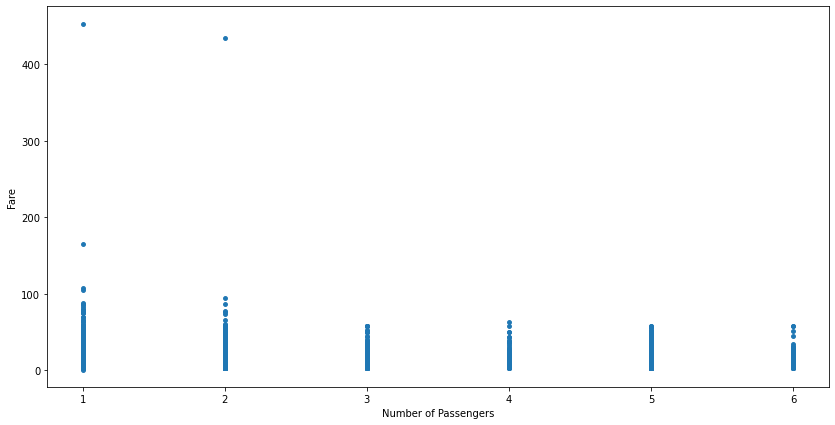

In [72]:
# Relation between number of passengers and fare

plt.figure(figsize=(14,7))
plt.scatter(x = train['passenger_count'], y = train['fare_amount'], s=15)
plt.xlabel('Number of Passengers')
plt.ylabel('Fare')
plt.show()

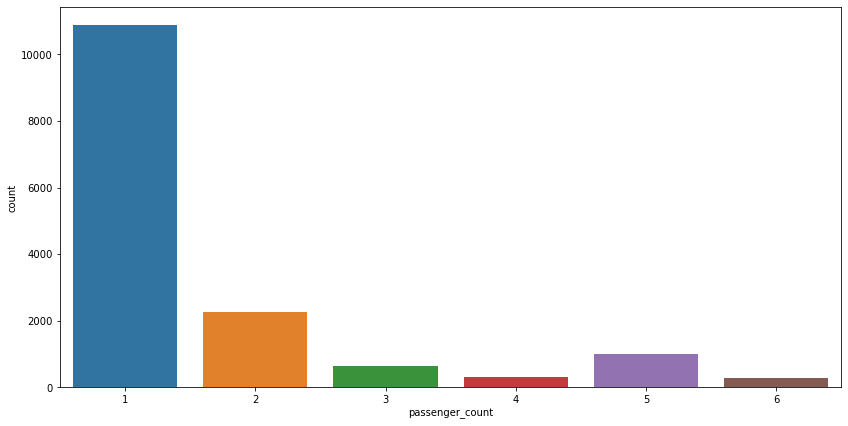

In [73]:
# Count plot for passenger count
plt.figure(figsize=(14,7))
sns.countplot(x='passenger_count', data=train)

<h3> Observations from the data visualization:</h3>

From the above plots we can see that:
<ol>
<li>Single passengers are most frequent travellers.</li>
<li>Single passengers are paying the highest fare for travelling.</li>
</ol>

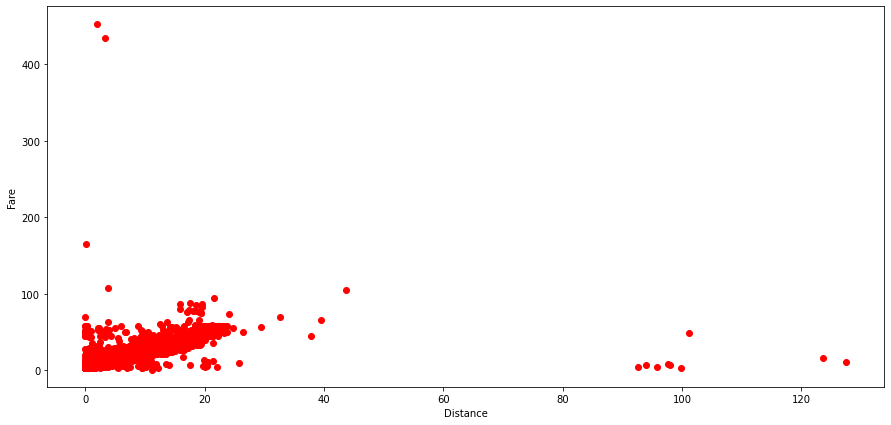

In [74]:
# Relationship between Distance and Fare
plt.figure(figsize=(15,7))
plt.scatter(x = train['distance'], y = train['fare_amount'], c='r')
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

We can see that distance will affect the fare charged from passengers.

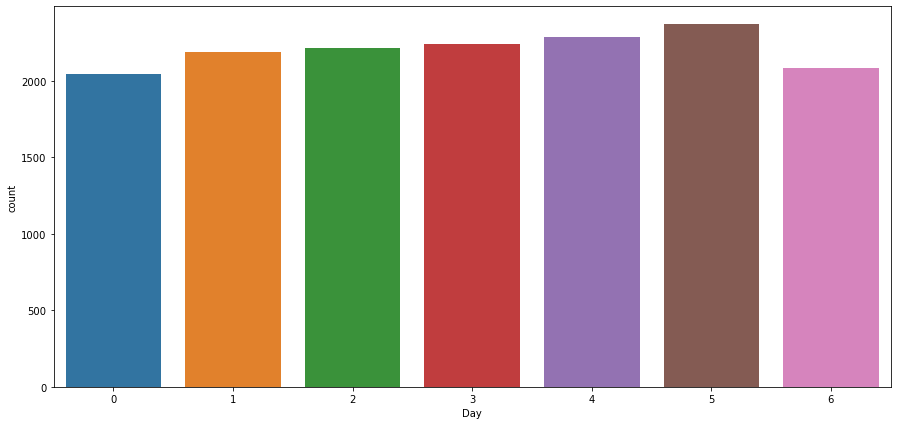

In [75]:
# Which day of the week does most cab rides occur?
plt.figure(figsize=(15,7))
sns.countplot(x='Day', data=train)

We can see from the countplot that day of the week doesn't seem to have much influence on the number of cab rides.

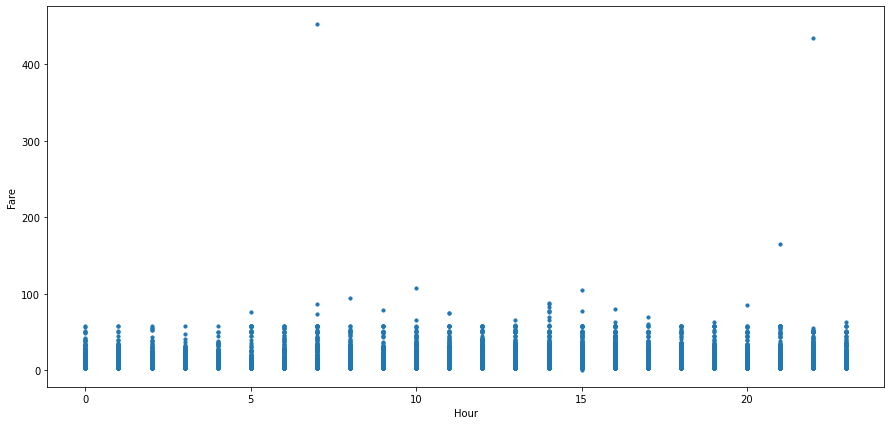

In [76]:
#Relationship between Time and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train['Hour'], y=train['fare_amount'], s=10)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.show()

We can see that fare is high between 7 AM and 11 PM. Hence we can conclude that cab taken in early morning and late night are costliest

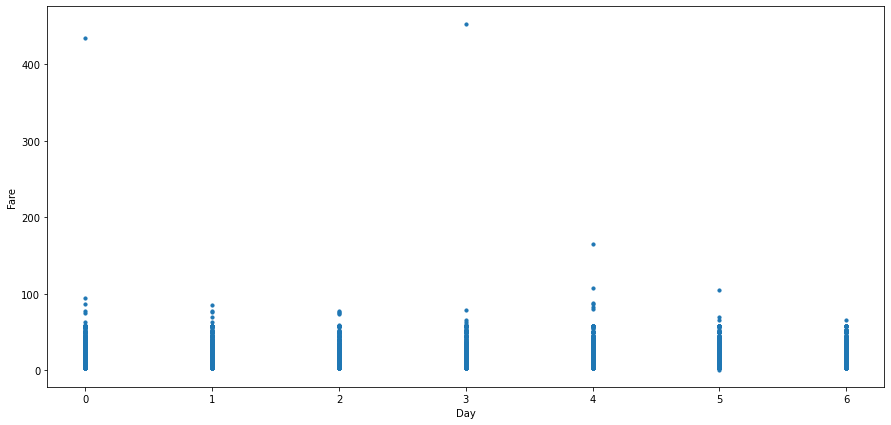

In [77]:
#Relationships between day and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train['Day'], y=train['fare_amount'], s=10)
plt.xlabel('Day')
plt.ylabel('Fare')
plt.show()

We can see that fares are higher on Sunday, Monday and Thursday. Due to low demand cabs are cheaper on saturdays.

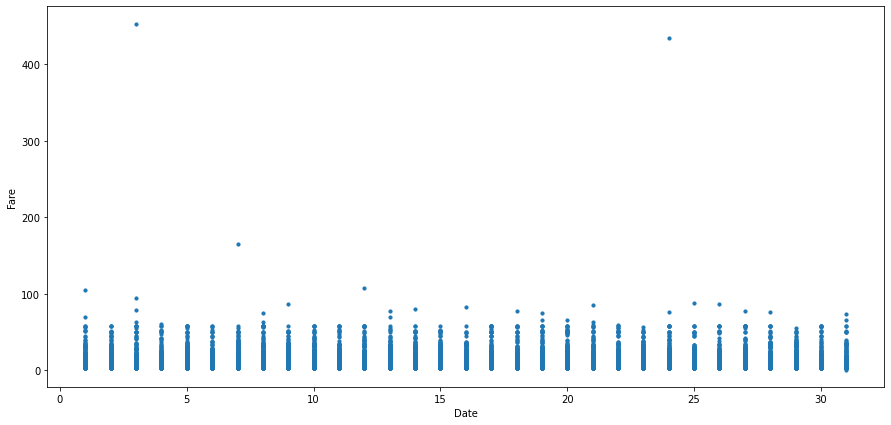

In [78]:
# Relationship between dte and fare
plt.figure(figsize=(15,7))
plt.scatter(x=train['Date'], y=train['fare_amount'], s=10)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()

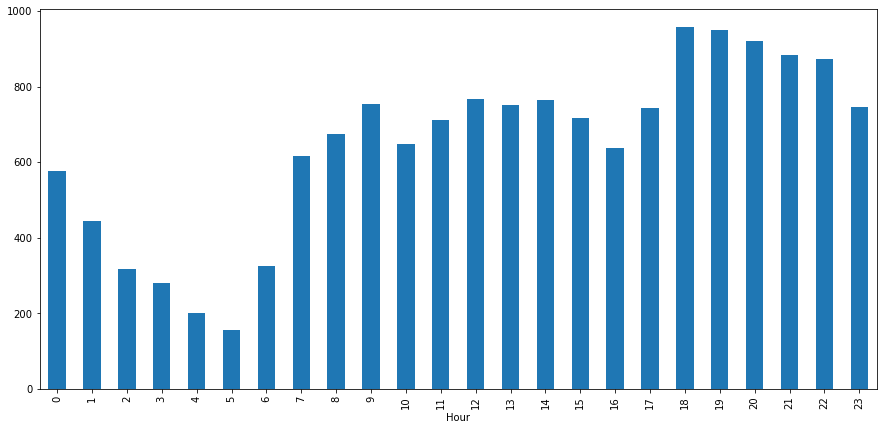

In [79]:
plt.figure(figsize=(15,7))
train.groupby(train['Hour'])['Hour'].count().plot(kind='bar')
plt.show()

Lowest cabs at 5 AM and highest at and around 7 PM i.e the office rush hours

<h1> Feature Scaling : </h1>

Normality check of training data is uniformly distributed or not

fare_amount


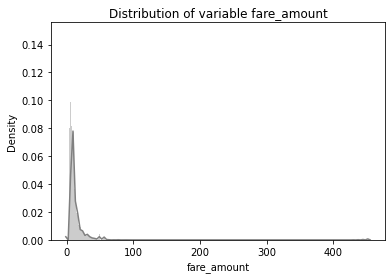

distance


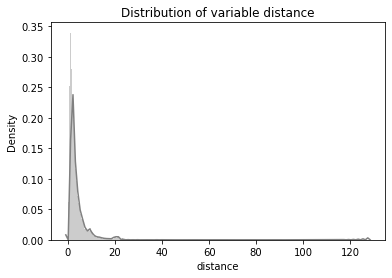

In [80]:
for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i], bins='auto', color='grey')
    plt.title('Distribution of variable '+i)
    plt.ylabel('Density')
    plt.show()

In [81]:
#since skewness of target variable is high, apply log transform to reduce the skewness-
train['fare_amount'] = np.log1p(train['fare_amount'])

#since skewness of distance variable is high, apply log transform to reduce the skewness-
train['distance'] = np.log1p(train['distance'])

fare_amount


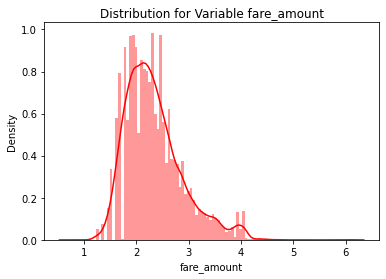

distance


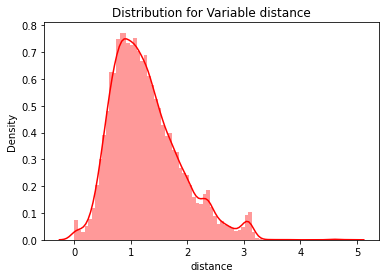

In [82]:
#Normality Re-check to check data is uniformly distributed or not after log transformartion

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='red')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

Here we can see bell shaped distribution. Hence our continous variables are now normally distributed, we will use not use any Feature Scalling technique. i.e, Normalization or Standarization for our training data

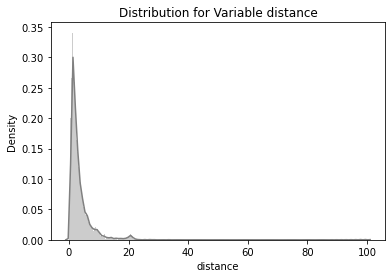

In [83]:
#Normality check for test data is uniformly distributed or not-

sns.distplot(test['distance'],bins='auto',color='grey')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

In [84]:
#since skewness of distance variable is high, apply log transform to reduce the skewness-
test['distance'] = np.log1p(test['distance'])

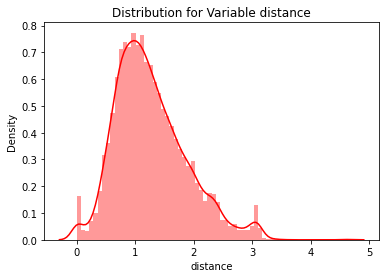

In [85]:
sns.distplot(test['distance'],bins='auto',color='red')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

As we can see a bell shaped distribution. Hence our continous variables are now normally distributed, we will use not use any Feature Scalling technique. i.e, Normalization or Standarization for our test data

<h2> Applying ML ALgorithms: </h2>

In [87]:
X_train, X_test, y_train, y_test = train_test_split( train.iloc[:, train.columns != 'fare_amount'], 
                         train.iloc[:, 0], test_size = 0.20, random_state = 1)

In [88]:
print(X_train.shape)
print(X_test.shape)

(12337, 7)
(3085, 7)


<h3> Linear Regression Model :</h3>

In [89]:
# Building model
fit_LR = LinearRegression().fit(X_train , y_train)

In [90]:
#prediction on train data
pred_train_LR = fit_LR.predict(X_train)

In [91]:
#prediction on test data
pred_test_LR = fit_LR.predict(X_test)

In [92]:
##calculating RMSE for test data
RMSE_test_LR = np.sqrt(mean_squared_error(y_test, pred_test_LR))

##calculating RMSE for train data
RMSE_train_LR= np.sqrt(mean_squared_error(y_train, pred_train_LR))

In [93]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_LR))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_LR))

Root Mean Squared Error For Training data = 0.2698951940237183
Root Mean Squared Error For Test data = 0.2534905644836057


In [94]:
#calculate R^2 for train data
from sklearn.metrics import r2_score
r2_score(y_train, pred_train_LR)

0.757047890336987

In [95]:
r2_score(y_test, pred_test_LR)

0.7767631864453098


<h3> Decision tree Model :</h3>

In [97]:
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

In [98]:
#prediction on train data
pred_train_DT = fit_DT.predict(X_train)

#prediction on test data
pred_test_DT = fit_DT.predict(X_test)

In [99]:
##calculating RMSE for train data
RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))

##calculating RMSE for test data
RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))

In [100]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_DT))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_DT))

Root Mean Squared Error For Training data = 0.29760682376077513
Root Mean Squared Error For Test data = 0.290292312942865


In [102]:
# R^2 calculation for train data
r2_score(y_train, pred_train_DT)

0.7045961563697947

In [103]:
# R^2 calculation for test data
r2_score(y_test, pred_test_DT)

0.7072389546458564

<h3>Random Forest Model :</h3>

In [104]:
fit_RF = RandomForestRegressor(n_estimators = 200).fit(X_train,y_train)

In [105]:
#prediction on train data
pred_train_RF = fit_RF.predict(X_train)
#prediction on test data
pred_test_RF = fit_RF.predict(X_test)

In [106]:
#calculating RMSE for train data
RMSE_train_RF = np.sqrt(mean_squared_error(y_train, pred_train_RF))
#calculating RMSE for test data
RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_RF))

In [107]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_RF))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_RF))

Root Mean Squared Error For Training data = 0.09499777619661808
Root Mean Squared Error For Test data = 0.23922176447353993


In [108]:
# calculate R^2 for train data

r2_score(y_train, pred_train_RF)

0.9699006407737126

In [109]:
#calculate R^2 for test data
r2_score(y_test, pred_test_RF)

0.8011875411495559

<h3> Gradient Boosting :</h3>

In [111]:
fit_GB = GradientBoostingRegressor().fit(X_train, y_train)

In [112]:
#prediction on train data
pred_train_GB = fit_GB.predict(X_train)

#prediction on test data
pred_test_GB = fit_GB.predict(X_test)

In [113]:
#calculating RMSE for train data
RMSE_train_GB = np.sqrt(mean_squared_error(y_train, pred_train_GB))
#calculating RMSE for test data
RMSE_test_GB = np.sqrt(mean_squared_error(y_test, pred_test_GB))

In [114]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_GB))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_GB))

Root Mean Squared Error For Training data = 0.22509701083504768
Root Mean Squared Error For Test data = 0.2372098539174258


In [115]:
#calculate R^2 for test data
r2_score(y_test, pred_test_GB)

0.804517596581854

In [116]:
#calculate R^2 for train data
r2_score(y_train, pred_train_GB)

0.8310065672462243

<h2> Optimizing the results with parameters tuning :</h2>

In [120]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [121]:
#Random Hyperparameter Grid

In [122]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV

In [123]:
#Random Search CV on Random Forest Model

RRF = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_rf = RandomizedSearchCV(RRF, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_rf = randomcv_rf.fit(X_train,y_train)
predictions_RRF = randomcv_rf.predict(X_test)

view_best_params_RRF = randomcv_rf.best_params_

best_model = randomcv_rf.best_estimator_

predictions_RRF = best_model.predict(X_test)

#R^2
RRF_r2 = r2_score(y_test, predictions_RRF)
#Calculating RMSE
RRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_RRF))

print('Random Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_RRF)
print('R-squared = {:0.2}.'.format(RRF_r2))
print('RMSE = ',RRF_rmse)

Random Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.8.
RMSE =  0.2384235140489643


In [124]:
gb = GradientBoostingRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(gb.get_params())


Parameters currently in use:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [125]:
#Random Search CV on gradient boosting model

gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_gb = RandomizedSearchCV(gb, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_gb = randomcv_gb.fit(X_train,y_train)
predictions_gb = randomcv_gb.predict(X_test)

view_best_params_gb = randomcv_gb.best_params_

best_model = randomcv_gb.best_estimator_

predictions_gb = best_model.predict(X_test)

#R^2
gb_r2 = r2_score(y_test, predictions_gb)
#Calculating RMSE
gb_rmse = np.sqrt(mean_squared_error(y_test,predictions_gb))

print('Random Search CV Gradient Boosting Model Performance:')
print('Best Parameters = ',view_best_params_gb)
print('R-squared = {:0.2}.'.format(gb_r2))
print('RMSE = ', gb_rmse)

Random Search CV Gradient Boosting Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.76.
RMSE =  0.2622972080850334


In [126]:
from sklearn.model_selection import GridSearchCV    
## Grid Search CV for random Forest model
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF = gridcv_rf.predict(X_test)

#R^2
GRF_r2 = r2_score(y_test, predictions_GRF)
#Calculating RMSE
GRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_GRF))

print('Grid Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_GRF)
print('R-squared = {:0.2}.'.format(GRF_r2))
print('RMSE = ',(GRF_rmse))


Grid Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 7, 'n_estimators': 11}
R-squared = 0.8.
RMSE =  0.23726332041318504


In [127]:
# Grid Search CV for gradinet boosting
gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_gb = GridSearchCV(gb, param_grid = grid_search, cv = 5)
gridcv_gb = gridcv_gb.fit(X_train,y_train)
view_best_params_Ggb = gridcv_gb.best_params_

#Apply model on test data
predictions_Ggb = gridcv_gb.predict(X_test)

#R^2
Ggb_r2 = r2_score(y_test, predictions_Ggb)
#Calculating RMSE
Ggb_rmse = np.sqrt(mean_squared_error(y_test,predictions_Ggb))

print('Grid Search CV Gradient Boosting regression Model Performance:')
print('Best Parameters = ',view_best_params_Ggb)
print('R-squared = {:0.2}.'.format(Ggb_r2))
print('RMSE = ',(Ggb_rmse))

Grid Search CV Gradient Boosting regression Model Performance:
Best Parameters =  {'max_depth': 5, 'n_estimators': 19}
R-squared = 0.79.
RMSE =  0.24645098909353058


<h2>Prediction of fare from provided test dataset :</h2>

We have already cleaned and processed our test dataset along with our training dataset. Hence we will be predicting using grid search CV for random forest model

In [129]:
# Grid Search CV for random Forest model
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF_test_Df = gridcv_rf.predict(test)

In [130]:
predictions_GRF_test_Df

array([2.34016701, 2.39507271, 1.70089184, ..., 3.97727843, 3.24016891,
       2.01225838])

In [131]:
test['Predicted_fare'] = predictions_GRF_test_Df

In [132]:
test.head()

,passenger_count,year,Month,Date,Day,Hour,distance,Predicted_fare
0,1,2015,1,27,1,13,1.200946,2.340167
1,1,2015,1,27,1,13,1.231205,2.395073
2,1,2011,10,8,5,11,0.481579,1.700892
3,1,2012,12,1,5,21,1.085538,2.207357
4,1,2012,12,1,5,21,1.854312,2.789622


In [133]:
test.to_csv('test.csv')